### Visualisation
It's better to make a graph out of the data we have. Many packages and libraries in Python to do that. Main ones are:
1. Matplotlib -- standard basic graphs.
        - Pyplot is the main sub-module
2. Seaborn -- adds nice aesthetics to the matplotlib graphs.
3. Plotly -- production grade interactive graphs, but mainly paid. 

In [1]:
import pandas as pd # for data frames
import seaborn as sns # add-on matplotlib .... Reference to The West Wing for alias
import matplotlib.pyplot as plt # sub-package of matplotlib
sns.set(color_codes=True)  # adds nice color to graphs
# tells Python to show the graphs, use ';' to get the graph not just the object 
# NOTE:: don't keep this comment inline
%matplotlib inline  

In [2]:
auto = pd.read_csv('Automobile.csv')  # read file for data

In [3]:
auto

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Plotting univariate distributions
Single Variable taking lots of values.
### Most convienient way is the Distribution Plot(distplot or displot)
1. drawn by distplot() -- deprecated.. Use displot or histplot
2. by default draws a Histogram(bins/groups along with frequency)
3. by default draws Kernel Density Estimate(KDE)

NOTE(because of distribution)::
1. Sum of height of all bars = 1
2. KDE is a curve over which integral is 1

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


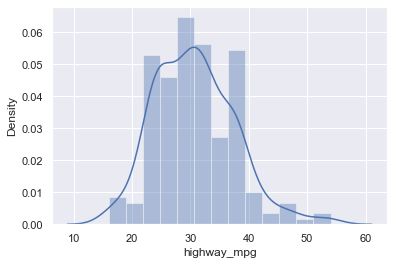

In [4]:
# plotting the histogram
sns.distplot(auto['highway_mpg']);

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


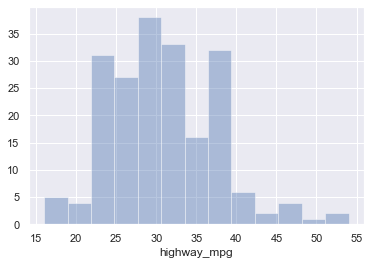

In [5]:
# we can turn off the KDE
sns.distplot(auto.highway_mpg,kde=False);

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


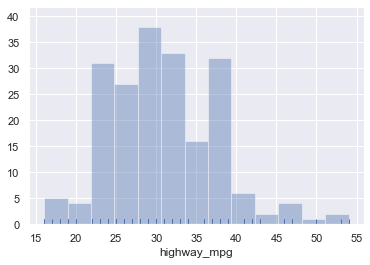

In [6]:
# we can add each data point on x-axis
sns.distplot(auto.highway_mpg,rug=True,kde=False);

# Plotting bivariate distributions
Visualise relationships between two variables. 

### Most convienient way is using jointplot() which creates a scatter plot alongwith the histograms by default.

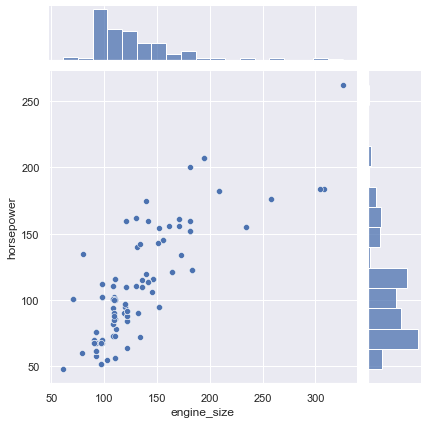

In [7]:
sns.jointplot(x=auto['engine_size'],y=auto.horsepower);

## Hex Bin Plots
we cam make hex bin plot i.e; 2-D area into hexagons and color gradient gives number of elements.

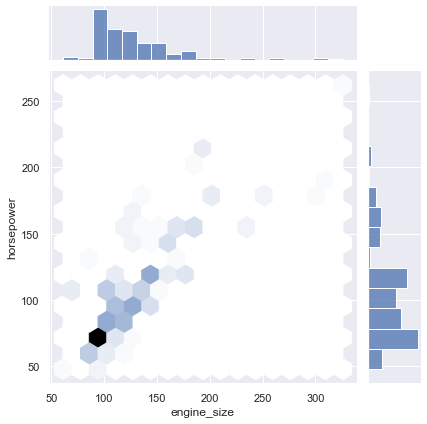

In [8]:
sns.jointplot(x=auto.engine_size,y=auto.horsepower,kind='hex');

## Kernel Densition Estimate(KDE)
to get a real feel for density of elements.
we get level sets.

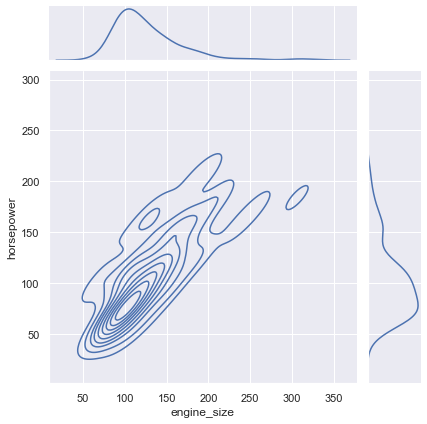

In [9]:
sns.jointplot(x=auto.engine_size,y=auto['horsepower'],kind='kde');

### Visualizing pairwise relationships in a dataset(pairplot)
Using pairplot we can create visulaisation pairwise.

Creates a matrix of axes and shows realtionship between each pair of columns in a dataframe using scatter plot.

Also draws a histogram along the diagonal for every variables.

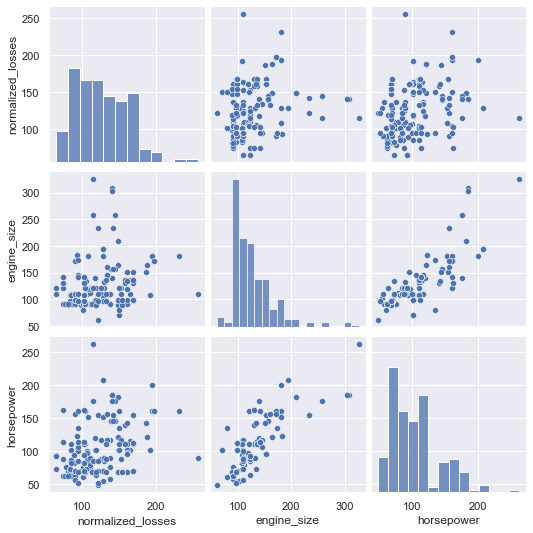

In [10]:
sns.pairplot(auto[['normalized_losses','engine_size','horsepower']]);

# Plotting with categorical data

### Strip Plot
is similar to scatter plot, but take sin parameter `jitter` to adjust positions because else categorical data will overlap making it very difficult to visualise.

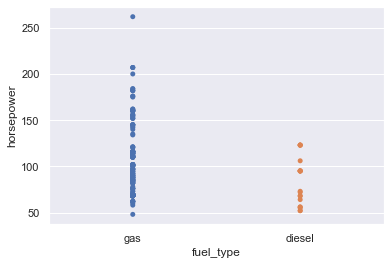

In [11]:
sns.stripplot(x=auto.fuel_type,y=auto['horsepower'],jitter=False);  # very difficult to visualise

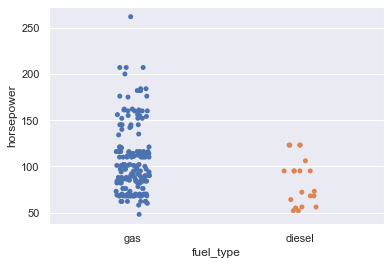

In [12]:
sns.stripplot(x=auto.fuel_type,y=auto.horsepower,jitter=True);
# better visualisation

### Swarm Plot
avoids overlapping.

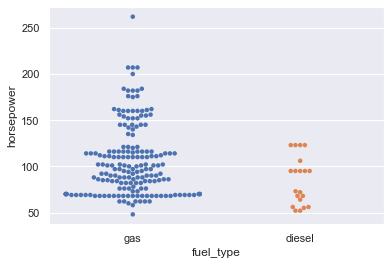

In [13]:
sns.swarmplot(x=auto.fuel_type,y=auto.horsepower,size=4.5);

### Box Plots
Introduces concept of `Median`.

Data can be split into *three quartiles* -- `Q1`, `Q2(Median - 50%)`, `Q3`.

Mid-line gives `Median`.

`Inter Quartile Range(IQR) = (Q3 - Q1) or distance between extreme quartiles`.

`Whiskers` extend to `1.5 IQRs` on extreme quartiles. From this we can infer whether data is `right/upper` skewed or `left/lower` skewed.
Outside this we have outliers.

NOTE:: If we don't get any median, probably we have less data.

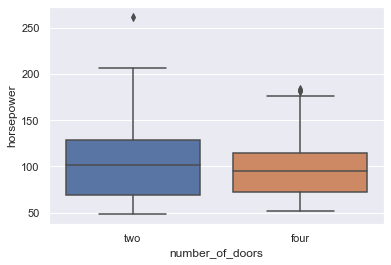

In [14]:
sns.boxplot(x=auto.number_of_doors,y=auto['horsepower']);

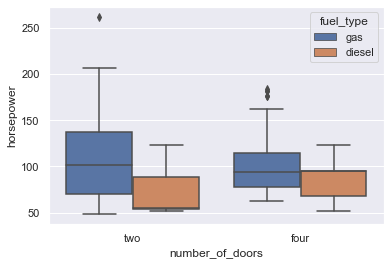

In [15]:
# hue represents different categorical data sets
sns.boxplot(x=auto['number_of_doors'],y=auto.horsepower,hue=auto.fuel_type);

### Bar Plot
is used to plot the mean and the confidence interval(for error).

NOTE:: Bar plot starts at 0, so we need to be careful.

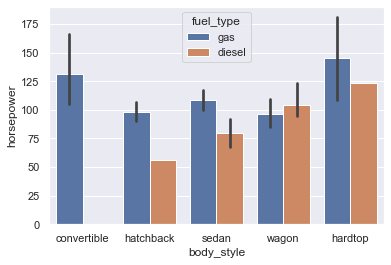

In [16]:
sns.barplot(x=auto.body_style,y=auto['horsepower'],hue=auto.fuel_type);

### Count Plot
Showing number of instances of a category. Similar to a histogram(continuous/quantitative).

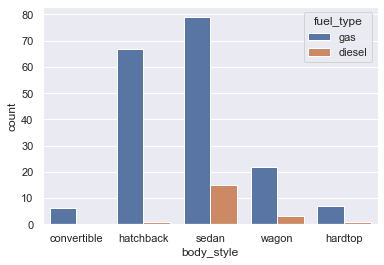

In [17]:
sns.countplot(x=auto.body_style,hue=auto.fuel_type);

### Point Plot
is similar to barplot, but gives a point for mean and the confidence interval.

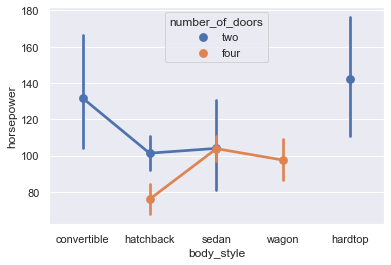

In [18]:
sns.pointplot(x=auto.body_style,y=auto.horsepower,hue=auto.number_of_doors);

## Drawing multi-panel categorical plots
using `catplot`.

NOTE:: Various types for `kind` are: {`point`,`bar`,`count`,`box`,`violin`,`strip`}

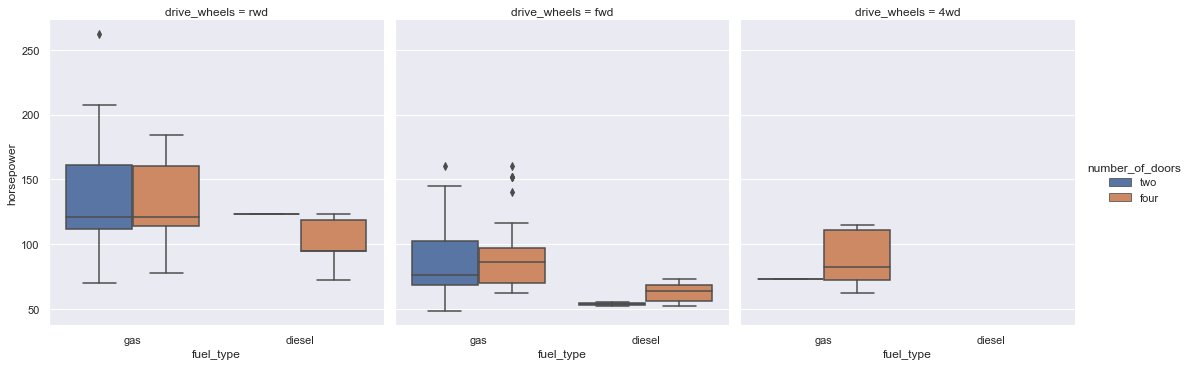

In [19]:
sns.catplot(x='fuel_type',y='horsepower',col='drive_wheels',
            hue='number_of_doors',kind='box',data=auto);

## Drawing linear regression models
`lmplot()` -- `linear model plot`.

Best straight line with shaded area as confidence interval.

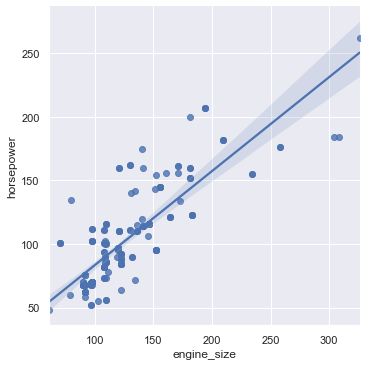

In [20]:
sns.lmplot(y='horsepower',x='engine_size',data=auto);

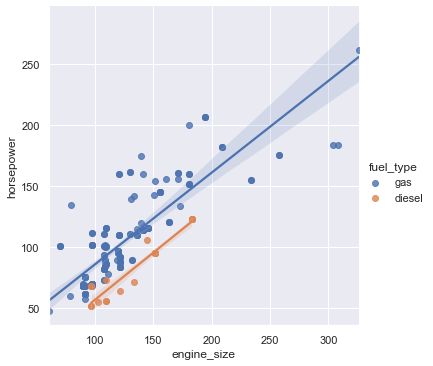

In [21]:
sns.lmplot(y='horsepower',x='engine_size',data=auto,hue='fuel_type');